# Project: Predicting Boston Housing Prices

## Getting Started
In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)


# Success
print("Boston housing dataset has {:3d} data points with {:3d} variables each.".format(data.shape[0],data.shape[1]))

Boston housing dataset has 489 data points with   4 variables each.


## Data Exploration

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In [5]:
minimum_price = np.min(prices)

maximum_price = np.max(prices)


mean_price = np.mean(prices)


median_price = np.median(prices)


std_price = np.std(prices)

##Additional feature metrics to be used later 
mean_features = np.mean(features)
std_features = np.std(features)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Discussion Point  - Feature Observation

As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.


Answer: 
The house price is likely proportional to 'RM' (more average number of rooms, more the house price)   and inversely proportional to 'LSTAT' and 'PTRATIO'(Lower the ratio more the house price)

1) House with large RM (more rooms) is more likely to cost more due to larger space.

2) Low LSTAT(less poor people) means the houses have  rich homeowners, thereby resulting in higher price of homes(Due to good location, better amentities etc as result rich people live there)

3) Low PTRATIO( ratio of students to teachers) means the houses are located at community with rich education resources(Schools are costlier as they are able to afford more teachers), which will raise the value of the house.

----

## Developing a Model
In this second section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable.


In [1]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
        
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Implementation: Shuffle and Split Data

In [8]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=0)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


## Analyzing Model Performance
In this third section of the project, We'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

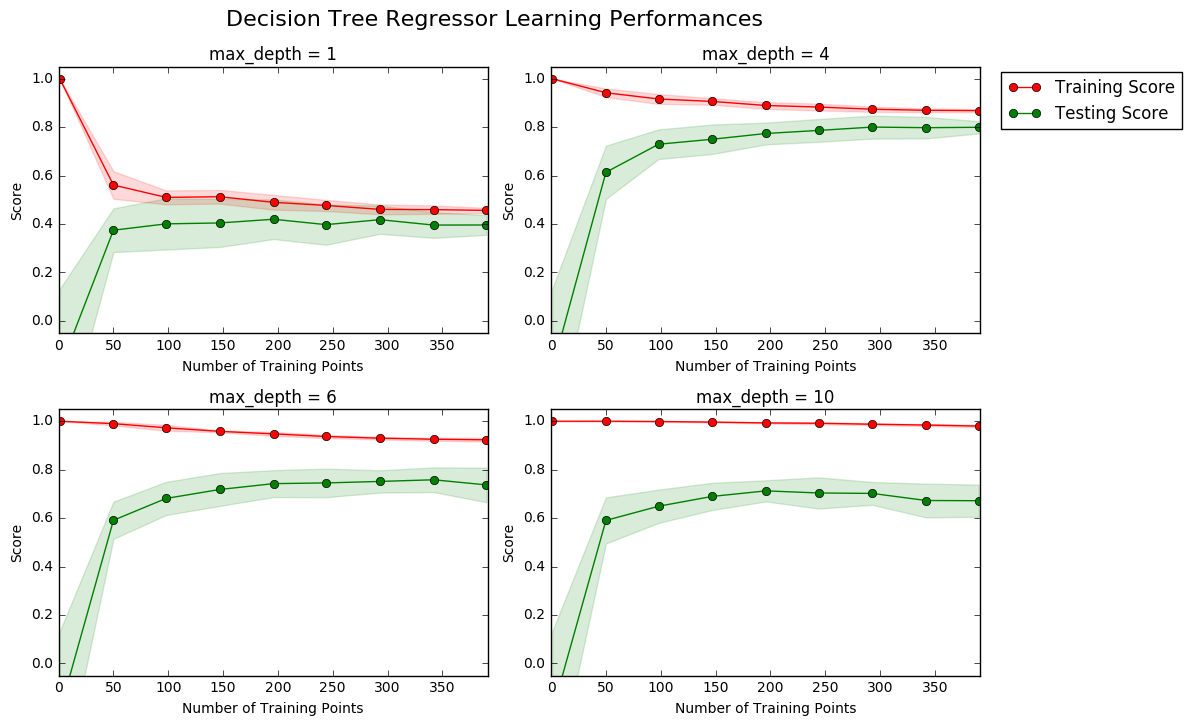

In [9]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Discussion  - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  


Answer: 
As depth goes from 1 to 10, the algorithm goes from underfitting to overfitting. So decision tree with max_depth = 4 is the best fit. So will pick this model for analysis.

A) What happens to the score of the training curve as more training points are added?

As we add more data points we get better score and by 300-350 training points the score becomes stable
Graph with depth=4 is a good fit, it does not suffer from overfitting or underfitting, so adding more training points after 300-350 points will not affect the trends (converging points or speed) of both learning curves.


B) What about the testing curve?

Initially when training points are less  testing score is very less than training score. Then it improves as number of training points is increased as model starts generalizing (It is optimal at 300-350 training data points). Finally as expected testing score is slightly less than training score

C) Would having more training points benefit the model?

Based on graph we can see scores converge at 300-350, additional training points might not be helpfull

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

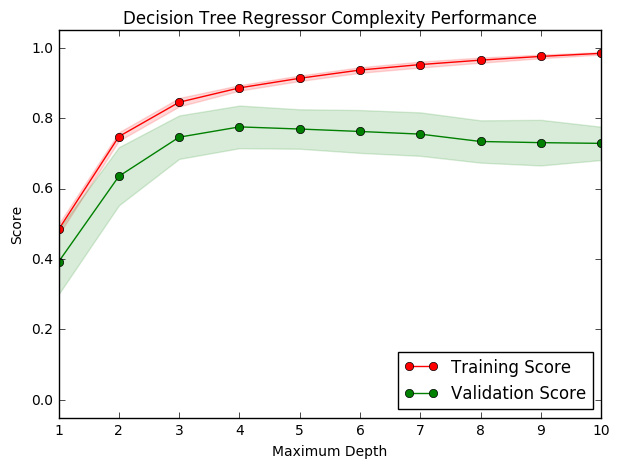

In [10]:
vs.ModelComplexity(X_train, y_train)

### Discussion Point - Bias-Variance Tradeoff

*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  

Answer:

1. When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?

    It suffers from high bias. The validation score is close to training score, and they are both much lower(~0.4-0.5) than desired value (~0.8 to 0.9), which suggests there is underfitting.

2. How about when the model is trained with a maximum depth of 10?

    It suffers from high variance. There is a big gap(~0.4) between validation score and training score, which indicates there is overfitting.
        
3. What visual cues in the graph justify your conclusions?

   The cues are gap between training and testing curves and how much are the values compared to desired value or 1.

### Discussion Point - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

Answer: The best maximum depth is 4. It's the point when two scores reach optimal level while there is no sign of overfitting or underfitting(After this level validation score deteriorates).

-----

## Evaluating Model Performance
In this final section of the project, we
will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Discussion Point - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

Answer:
A) What is the grid search technique 

It is also known as Hyperparameter optimization. It is an exhaustive searching over subsets of multiple hyperparameters to get best hyper parameter for arriving at best model. As we know hyperparameters are not learnt by learning algorithm and needs to be passed explicitily.For e.g in ridge linear regression learning algorithm will learn coefficients/ weights(parameters) but alpha value( hyper-parameter for regularization) needs to be passed explicitily to learning algorithm and this can be tuned using grid search technique . For this project max depth of tree is hyperparameter

B)How it can be applied to optimize a learning algorithm

Grid search technique basically takes set of hyperparameters values(In this project it is set of decision tree Max_Depth values from 1-10, we need to find which hyperparameter gets best model score),cross validation data set, estimator(Decision tree for this project) and scoring method(R2 score). By using cross validation technique(Itertatively goes thru various training and validation data sets with each of hyperparameter values),finally  chooses hyperparameter which gives best score for model(least error).In this project our best hyperparameter value comes to be max depth of 4 

### Discussion Point - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  

Answer: 
1) What is the k-fold cross-validation training technique? 
It's a method to use all data as training sets and testing sets via roation and averaging. The process is as following: a) divide the data into k folds of eqaully large chunks b) iterate through the k chunks, use the current chunk for validation and other k-1 chunks for training c) average over the validation scores to give a single validation score for the learning algorithm

2)What benefit does this technique provide for grid search when optimizing a model?
The advantage of k-fold cross-validation is that all the examples in the dataset are eventually used for both training and testing, which makes it more robust to variations of parameters in grid search.
Grid search may overfit the validation set if certain evaluation data points are outliers. It can be eliminated by averaging over k-times evaluations using all data points.

### Implementation: Fitting a Model
Final implementation requires that we bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In [11]:
#Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':list(range(1, 11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    print(grid.best_estimator_)
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Discussion Point - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  



In [12]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')
Parameter 'max_depth' is 4 for the optimal model.


Answer: The optimal model has max_depth=4, it's equal to the result max_depth=4 in Question 6.


### Discussion Point - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  

In [19]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions and how far they are spread from mean
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f} = Mean_price {:+.2f} * Std_price".format(i+1, 
                                                                                                      price, 
                                                                                                      (price-mean_price)/std_price))
# Show statistics of features in client_data
print("\n Statistics of Client Data's features :")
for i, client in enumerate(client_data):
    print("Client {}: Mean_RM{:+.2f}*std_RM, Mean_LSTAT{:+.2f}*std_LSTAT, Mean_PTRATIO{:+.2f}*Std_PTRATIO".format(i+1,
                    *list((client - mean_features) / std_features)))


Predicted selling price for Client 1's home: $391,183.33 = Mean_price -0.38 * Std_price
Predicted selling price for Client 2's home: $189,123.53 = Mean_price -1.61 * Std_price
Predicted selling price for Client 3's home: $942,666.67 = Mean_price +2.96 * Std_price

 Statistics of Client Data's features :
Client 1: Mean_RM-1.93*std_RM, Mean_LSTAT+0.57*std_LSTAT, Mean_PTRATIO-1.67*Std_PTRATIO
Client 2: Mean_RM-3.48*std_RM, Mean_LSTAT+2.69*std_LSTAT, Mean_PTRATIO+1.65*Std_PTRATIO
Client 3: Mean_RM+2.74*std_RM, Mean_LSTAT-1.40*std_LSTAT, Mean_PTRATIO-3.09*Std_PTRATIO


Answer:
A) What price would you recommend each client sell his/her home at?

Below are the prices predicted by model. They are average priced house, low priced house, and high priced house respectively by their deviation from mean_price measured in std_price. 

Predicted selling price for Client 1's home: $391,183.33 = Mean_price -0.38 * Std_price 

Predicted selling price for Client 2's home: $189,123.53 = Mean_price -1.61 * Std_price 

Predicted selling price for Client 3's home: $942,666.67 = Mean_price +2.96 * Std_price 

B) Do these prices seem reasonable given the values for the respective features?

Yes. The predicated prices are reasonable considering dataset statistics and our observation in Question 1 that house price is likely to be in proportion to RM, and in inverse proportion to LSTAT or PTRATIO.
We can analyze using the statistics of data features, namely the sign and extent of deviation from mean value. Take client 3 as an example, the deviations of three features all increase the house price based on assumpution in Question 1, thus leading to a higher than average house.

The analysis of other clients are similar.
Statistics of client_data's features 

Client 1: Mean_RM-1.93*std_RM, Mean_LSTAT+0.57*std_LSTAT, Mean_PTRATIO-1.67*Std_PTRATIO 

Client 2: Mean_RM-3.48*std_RM, Mean_LSTAT+2.69*std_LSTAT, Mean_PTRATIO+1.65*Std_PTRATIO 

Client 3: Mean_RM+2.74*std_RM, Mean_LSTAT-1.40*std_LSTAT, Mean_PTRATIO-3.09*Std_PTRATIO 


Statistics for Boston housing dataset

Minimum price: $105,000.00

Maximum price: $1,024,800.00

Mean price: $454,342.94

Median price $438,900.00

Standard deviation of prices: $165,171.13

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

In [20]:
vs.PredictTrials(features, prices, fit_model, client_data)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')
Trial 1: $391,183.33
DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')
Trial 2: $424,935.00
DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')
Trial 3: $415,800.00
DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nod